# Name:Ajit A Gouda

# Batch:DS2311

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
df=pd.read_csv('hr.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


#### Checking Null values

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

take in: Hence there is no Null Values

#### checking datatypes of the features

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Take in: here are categorical value also and numberical value also

#### checking the counts of the features

Text(0.5, 0, 'Attrition')

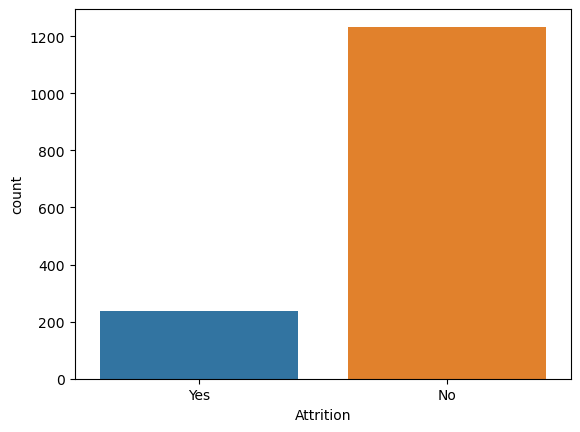

In [6]:
sns.countplot(x='Attrition',data=df)
plt.xlabel('Attrition')

take in:As we see there is very highly imbalanced datasets.

Text(0, 0.5, 'Age')

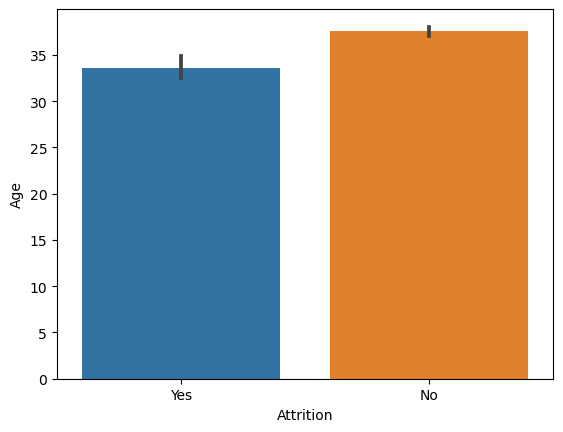

In [7]:
sns.barplot(x='Attrition',y='Age',data=df)
plt.xlabel('Attrition')
plt.ylabel('Age')

Text(0.5, 0, 'BusinessTravel')

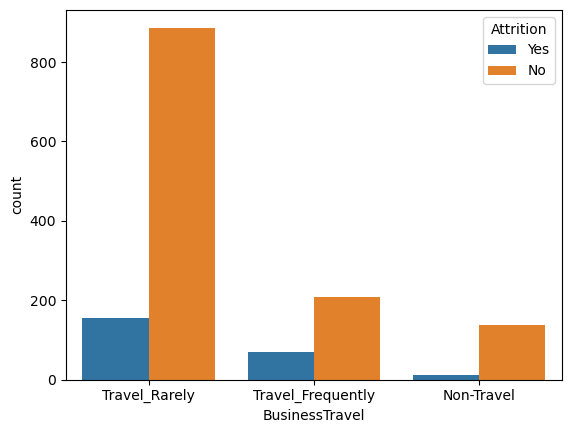

In [8]:
sns.countplot(x='BusinessTravel',data=df,hue='Attrition')
plt.xlabel('BusinessTravel')

Take in: As we see the above graph the employes who are rarely traveling are facing high attrition comapared to the frequently travelers and non-travelers

Text(0.5, 0, 'Department')

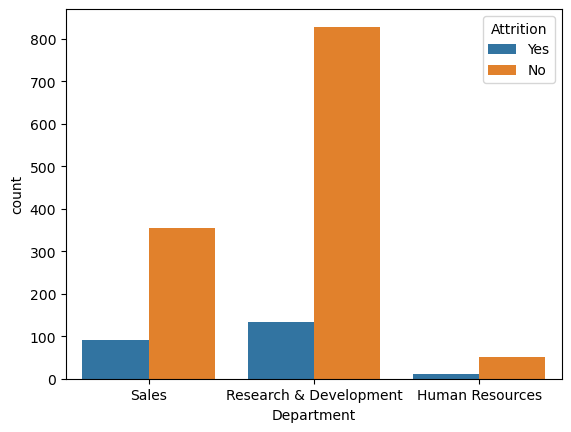

In [9]:
sns.countplot(x='Department',data=df,hue='Attrition')
plt.xlabel('Department')

take in: As we see that the research and development department have the attrition compared to the sales and human resources

In [10]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

Text(0.5, 0, 'JobRole')

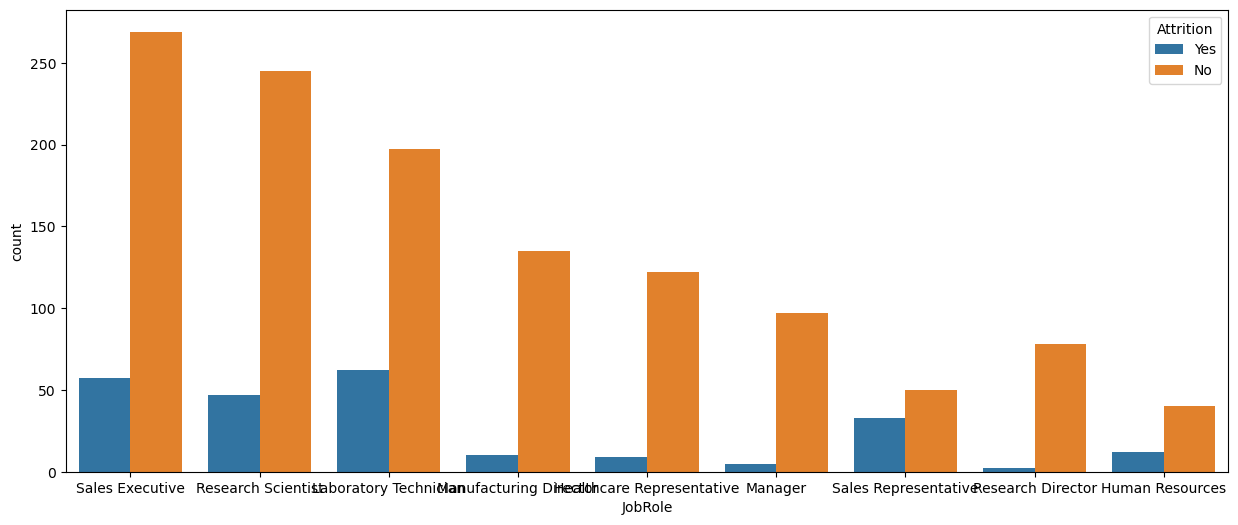

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='JobRole',data=df,hue='Attrition')
plt.xlabel('JobRole')

take in: as we see that the sales executive, research scientist, laboratory Technician are having high attrition compared to the other jobroles

Text(0.5, 0, 'Gender')

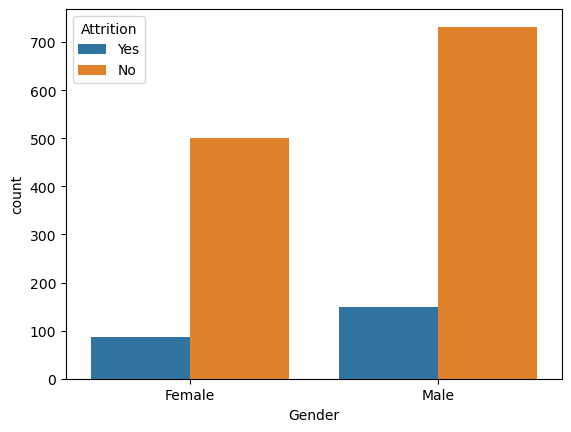

In [12]:
sns.countplot(x='Gender',data=df,hue='Attrition')
plt.xlabel('Gender')

Take in:compared to female, Male have high Attrition as we see tthe ratio 1 out of 5 employees attrition is there

Text(0.5, 0, 'MaritalStatus')

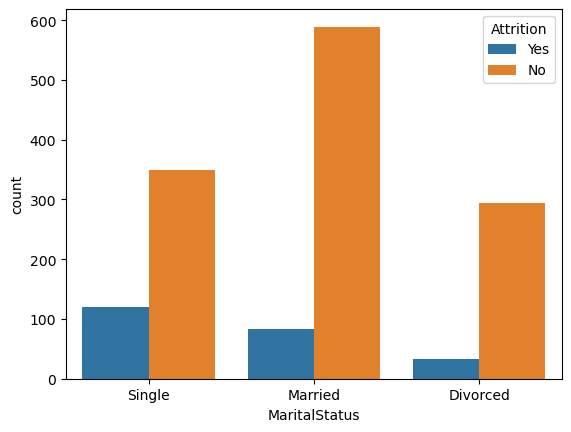

In [13]:
sns.countplot(x='MaritalStatus',data=df,hue='Attrition')
plt.xlabel('MaritalStatus')

Take in: In singles the ratio is higher

Text(0.5, 0, 'OverTime')

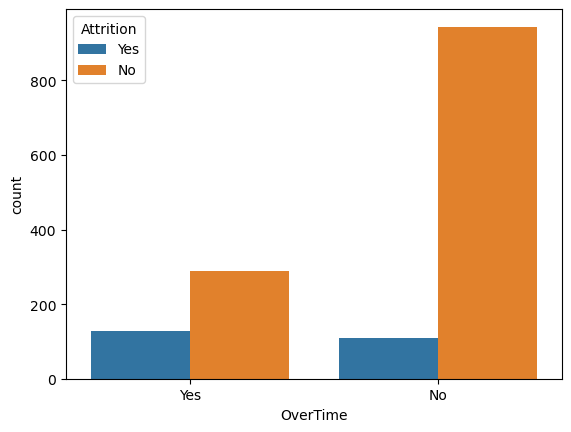

In [14]:
sns.countplot(x='OverTime',data=df,hue='Attrition')
plt.xlabel('OverTime')

Take in: As we see that the employess who do overtime the proportion is higher

In [15]:
numerical_data=df.select_dtypes(include='number')

In [16]:
numerical_data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,6,1,1,2062,4,42,2,3,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,4,3,1,2064,2,87,4,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,3,1,2065,4,63,2,2,...,4,80,0,17,3,2,9,6,0,8


In [17]:
numerical_data.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [18]:
numerical_data.skew()
print('Total number of Numerical Features:',len(numerical_data.skew()))
print('Count of features which are skewed:',len(numerical_data.skew().loc[abs(numerical_data.skew())>0.5]))

Total number of Numerical Features: 26
Count of features which are skewed: 14


<Axes: >

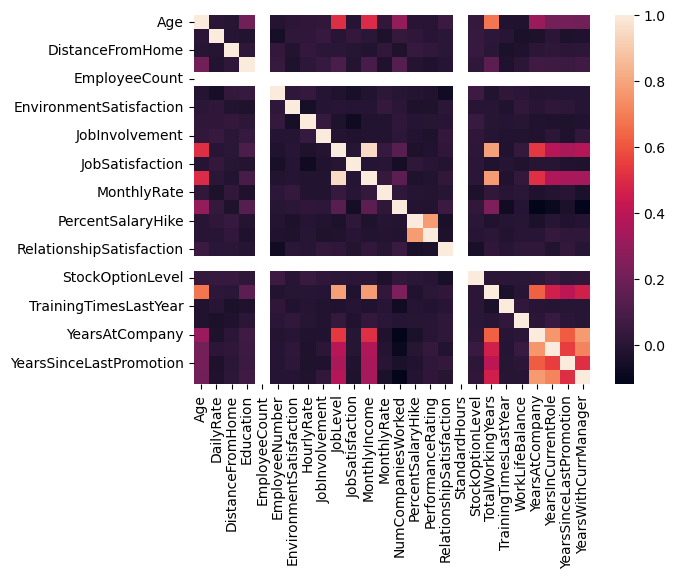

In [19]:
sns.heatmap(numerical_data.corr(),)

lets drop the unwanted columns

In [20]:
df.drop(columns=["EmployeeNumber","Over18","EmployeeCount","StandardHours",],inplace=True)

In [21]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [22]:
x=df.drop(columns=['Attrition'])

In [23]:
y=df['Attrition']

lets treat the skewness

In [24]:
for index in numerical_data.skew().index:
    if numerical_data.skew().loc[index]>0.5:
        numerical_data[index]=np.log1p(numerical_data[index])
    if numerical_data.skew().loc[index]<-0.5:
        numerical_data[index]=np.square(numerical_data[index])

In [25]:
numerical_data.skew()
print('Total number of Numerical Features:',len(numerical_data.skew()))
print('Count of features which are skewed:',len(numerical_data.skew().loc[abs(numerical_data.skew())>0.5]))

Total number of Numerical Features: 26
Count of features which are skewed: 3


 taken in :almost the skewness is removed

lets see the categorical data

In [26]:
categorical_data=df.select_dtypes(include='object')

In [27]:
categorical_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


now we will use the Label encoder to convert the categorical data into numerical data

In [28]:
le=LabelEncoder()

In [29]:
categorical_data['Attrition']=le.fit_transform(categorical_data['Attrition'])

In [30]:
list1=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for i in list1:
    categorical_data[i]=le.fit_transform(categorical_data[i])

In [31]:
categorical_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,1,2,2,1,0,7,2,1
1,0,1,1,1,1,6,1,0
2,1,2,1,4,1,2,2,1
3,0,1,1,1,0,6,1,1
4,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0
1466,0,2,1,3,1,0,1,0
1467,0,2,1,1,1,4,1,1
1468,0,1,2,3,1,7,1,0


Hence the Categorical_data are been converted to Numerical_value

lets join the categorical_data and numerical_data into a dataframe

In [32]:
x=pd.merge(numerical_data,categorical_data,left_index=True,right_index=True)

In [33]:
x

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,0.693147,2,1,1,2,94,3,1.098612,...,0.000000,1.791759,1,2,2,1,0,7,2,1
1,49,279,2.197225,1,1,2,3,61,2,1.098612,...,0.693147,2.079442,0,1,1,1,1,6,1,0
2,37,1373,1.098612,2,1,4,4,92,2,0.693147,...,0.000000,0.000000,1,2,1,4,1,2,2,1
3,33,1392,1.386294,4,1,5,4,56,3,0.693147,...,1.386294,0.000000,0,1,1,1,0,6,1,1
4,27,591,1.098612,1,1,7,1,40,3,0.693147,...,1.098612,1.098612,0,2,1,3,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,1,2061,3,41,4,1.098612,...,0.000000,1.386294,0,1,1,3,1,2,1,0
1466,39,613,1.945910,1,1,2062,4,42,2,1.386294,...,0.693147,2.079442,0,2,1,3,1,0,1,0
1467,27,155,1.609438,3,1,2064,2,87,4,1.098612,...,0.000000,1.386294,0,2,1,1,1,4,1,1
1468,49,1023,1.098612,3,1,2065,4,63,2,1.098612,...,0.000000,2.197225,0,1,2,3,1,7,1,0


In [34]:
x=x.drop(columns='Attrition',axis=1)

we will remove the unwanted columns 

In [35]:
x=x.drop(columns='EmployeeNumber',axis=1)
# as it is not important

In [36]:
x=x.drop(columns='EmployeeCount',axis=1)

In [37]:
x=x.drop(columns='StandardHours',axis=1)

Lets bring all the values into standard scaler

In [38]:
sc=StandardScaler()
sc.fit(x)
X=sc.transform(x)
X=pd.DataFrame(x,columns=x.columns)

In [39]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,1.609438,0.000000,1.791759,2,2,1,0,7,2,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,2.079442,0.693147,2.079442,1,1,1,1,6,1,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,0.000000,0.000000,0.000000,2,1,4,1,2,2,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,2.079442,1.386294,0.000000,1,1,1,0,6,1,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1.098612,1.098612,1.098612,2,1,3,1,2,1,0


In [40]:
x.dtypes

Age                           int64
DailyRate                     int64
DistanceFromHome            float64
Education                     int64
EnvironmentSatisfaction       int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobSatisfaction               int64
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
BusinessTravel                int32
Department                    int32
EducationField                int32
Gender                        int32
JobRole                     

In [41]:
Y=y

In [42]:
smt=SMOTE()

In [43]:
balance_x,balance_y=smt.fit_resample(X,Y)

Finding the best random state for the logistic classiffier

In [50]:
balance_x.dtypes

Age                           int64
DailyRate                     int64
DistanceFromHome            float64
Education                     int64
EnvironmentSatisfaction       int64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                    float64
JobSatisfaction               int64
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     float64
YearsWithCurrManager        float64
BusinessTravel                int32
Department                    int32
EducationField                int32
Gender                        int32
JobRole                     

In [52]:
balance_y.dtypes

dtype('O')

In [44]:
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(balance_x,balance_y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7864864864864864 on Random_state 14


In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(balance_x,balance_y, random_state=14, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7864864864864864


Confusion matrix of Logistics Regression : 
 [[295  66]
 [ 92 287]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.76      0.82      0.79       361
         Yes       0.81      0.76      0.78       379

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



In [58]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('-'*100)

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7864864864864864


Confusion matrix : 
 [[295  66]
 [ 92 287]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.76      0.82      0.79       361
         Yes       0.81      0.76      0.78       379

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



----------------------------------------------------------------------------------------------------
Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.4972972972972973


Confusion matrix : 
 [[330  31]
 [341  38]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.49      0.91      0.64       361
         Yes       0.55      0.10      0.17       379

    accuracy                           0.50       740
 

## Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 2),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m,x,y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('-'*100)



Cross Validation Score LogisticRegression() :

Score : [0.84013605 0.84693878 0.84353741 0.84693878 0.84693878]
Mean Score : 0.8448979591836736
Std deviation : 0.0027210884353741525


----------------------------------------------------------------------------------------------------


Cross Validation Score SVC() :

Score : [0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
Mean Score : 0.8387755102040817
Std deviation : 0.0016663195529137286


----------------------------------------------------------------------------------------------------


Cross Validation Score GaussianNB() :

Score : [0.82312925 0.81632653 0.79931973 0.79591837 0.85714286]
Mean Score : 0.8183673469387754
Std deviation : 0.021895886992423227


----------------------------------------------------------------------------------------------------


Cross Validation Score DecisionTreeClassifier() :

Score : [0.78571429 0.80612245 0.81292517 0.76190476 0.79591837]
Mean Score : 0.792517006802721
Std deviation 

- Our evaluation process using cross-validation scores and F1 scores yielded promising results for both Extra Trees Classifier and Random Forest Classifier. However, considering the size of our dataset, which is not exceptionally large, we will prioritize the Random Forest Classifier for the modeling stage.

- While Extra Trees Classifiers are often well-suited for handling massive datasets, the Random Forest's performance on our data suggests it can be an effective choice in this instance. This selection ensures a balance between model capability and dataset size.

In [60]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameter={'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, None],
    'criterion': ['gini', 'entropy']}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(),param_grid,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 1/5; 1/72] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.861 total time=   0.2s
[CV 2/5; 1/72] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 2/5; 1/72] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.843 total time=   0.2s
[CV 3/5; 1/72] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 3/5; 1/72] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.841 total time=   0.3s
[CV 4/5; 1/72] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 4/5; 1/72] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100;, score=0.843 total time=   0.2s
[CV 5/5; 1/72] START criterion=gini, max_depth=4, max_features=auto, n_estimators=100
[CV 5/5; 1/72] END criterion=gini, max_d

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

In [65]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'n_estimators': 300}

In [66]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 300, max_depth=None ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9243243243243243


# Saving model

In [68]:
import joblib
joblib.dump(Final_mod,'HrAnalytics.pkl')

['HrAnalytics.pkl']